In [1]:
"""
Created on Tuesday 3 April 2022
Author: ZMW
"""
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import pickle
from xgboost import cv
from numpy import mean
from numpy import std
from xgboost import plot_importance
import xgboost as xgb
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
import shap
from sklearn.preprocessing import StandardScaler, LabelEncoder
import os


### Reading dataset

In [2]:
# data path
path = os.getcwd()
dirname = os.path.dirname(path)

# for window
#data_file = "data\\data.csv"

#for linux
data_file = 'data/data.csv'
data_path = os.path.join(dirname,data_file)

In [3]:
#Load the fitted dataset
data = pd.read_csv(data_path)

In [4]:
data

,Label,Patient,A1_1Deg,A1_1Deg_err,B1_1Deg,B1_1Deg_err,C1_1Deg,C1_1Deg_err,1_Deg_ResSoS_1,1Deg_AdjR2_1,...,8_Deg_ResSoS_1,8Deg_AdjR2_1,A2_8Deg,A2_8Deg_err,B2_8Deg,B2_8Deg_err,C2_8Deg,C2_8Deg_err,8_Deg_ResSoS_2,8Deg_AdjR2_2
0,Not_Parkinson's,PD001,10.388190,0.006132,0.049329,0.000006,0.011989,0.000337,8928.709194,0.990598,...,6698.838281,0.951413,10.273124,0.044206,0.386347,0.000384,0.037356,0.002439,6809.455800,0.939095
1,Not_Parkinson's,PD002,10.429055,0.006929,0.049478,0.000007,0.002837,0.000379,11388.604704,0.988092,...,4769.901822,0.967360,11.482500,0.049154,0.395412,0.000380,-0.002486,0.002419,8383.481840,0.939586
2,Not_Parkinson's,PD003,10.097088,0.005091,0.049368,0.000006,0.005707,0.000287,6140.292312,0.993141,...,3488.747176,0.968709,10.084338,0.019838,0.394595,0.000174,-0.035466,0.001106,1349.962240,0.987259
3,Not_Parkinson's,PD004,10.482881,0.022179,0.049585,0.000023,0.016056,0.001212,117748.979710,0.879372,...,10972.045844,0.920137,11.493414,0.048867,0.401386,0.000377,-0.042463,0.002395,8242.136178,0.940370
4,Not_Parkinson's,PD005,10.181273,0.008833,0.049368,0.000010,0.001569,0.000494,18447.340517,0.979692,...,18268.960666,0.809586,10.370348,0.036121,0.395392,0.000308,-0.030769,0.001960,4485.300264,0.960035
5,Not_Parkinson's,PD006,10.302529,0.010450,0.049283,0.000011,0.019735,0.000580,25994.527943,0.972249,...,7175.782112,0.938474,10.356903,0.067627,0.410282,0.000584,-0.052723,0.003707,16046.923323,0.859535
6,Not_Parkinson's,PD007,9.934379,0.007838,0.049209,0.000009,0.003633,0.000449,14490.496516,0.983200,...,1465.027123,0.985896,9.801698,0.024067,0.397850,0.000217,-0.045138,0.001380,1986.965945,0.980134
7,Not_Parkinson's,PD008,9.861257,0.026999,0.049220,0.000030,0.051865,0.001576,176009.839073,0.798036,...,15508.422642,0.870504,8.591437,0.105215,0.415729,0.001098,-0.078941,0.006967,39005.324498,0.507026
8,Not_Parkinson's,PD009,10.221777,0.005149,0.049244,0.000006,0.002274,0.000287,6253.730577,0.993152,...,849.603210,0.992275,10.305625,0.022845,0.396998,0.000196,-0.056233,0.001244,1783.111545,0.983816
9,Not_Parkinson's,PD010,10.244784,0.017579,0.050004,0.000019,-0.015054,0.000981,73606.211066,0.920684,...,13818.787560,0.878166,10.997960,0.085181,0.406918,0.000690,-0.043189,0.004387,25335.919452,0.802179


### Add gain as feature

In [5]:
# OneDegGain = np.array([
#                     0.912073221615219,
#                     0.913615300167855,
#                     0.946453363089275,
#                     0.930324124079886,
#                     1.02416020436668,
#                     0.860239837548296,
#                     0.964705222165739,
#                     0.926124390992111,
#                     0.968894500894799,
#                     0.971483673217362,
#                     0.944374366569671,
#                     0.933778991410942,
#                     0.890761283462127,

#                     1.01702677636733,
#                     1.01132254481336,
#                     0.860332024178068,
#                     0.898244125409108,
#                     0.79226520992959,
#                     0.86763213956782,

#                     1.04294995675946,
#                     0.954852019394754,
#                     0.83139435252038,
#                     0.969027023632338,
#                     0.819025317130086,
#                     1.59441787272771,
#                     0.827558754578517,
#                     0.882328237761475,
#                     0.888806663106777  
#                 ])

# TowDegGain  = np.array([
#                     0.88795482315922,
#                     0.85125583179904,
#                     0.90557113971074,
#                     0.839308531914961,
#                     0.944624517823793,
#                     0.936063494064383,
#                     0.919761689613053,
#                     0.857703024614198,
#                     0.973218178159532,
#                     0.936570806828469,
#                     0.955653090017782,
#                     0.943385867113339,
#                     1.0186446733178,

#                     0.957719524164782,
#                     0.847863270306327,
#                     0.762131387734656,
#                     0.71762368625312,
#                     0.699023420441996,
#                     0.860669705999712,
                    
#                     0.882514198813699,
#                     0.900439093391636,
#                     0.852845556682743,
#                     0.662387043701962,
#                     1.02691189892667,
#                     0.929980500477329,
#                     0.795054974778894,
#                     0.915409616170048,
#                     0.936562782215738
# ])

# FourDegGain = np.array([
#                     0.842657428787201,
#                     0.927453824629543,
#                     0.86099798858682,
#                     0.826284460023473,
#                     0.907866303422781,
#                     0.886319852935139,
#                     0.879363613650586,
#                     0.945246226705543,
#                     0.865730996104868,
#                     0.949044695789533,
#                     0.927054434038832,
#                     0.907460103985577,
#                     0.768451296309936,

#                     0.670432552659765,
#                     0.82906287014668,
#                     0.792533491957787,
#                     0.564497325152498,
#                     0.566934462769341,
#                     0.745104906289544,

#                     0.863969643770036,
#                     0.810695262798471,
#                     0.665919934919724,
#                     0.531701684005337,
#                     0.804825842988611,
#                     0.849537457619557,
#                     0.843883703581647,
#                     0.696788329556185,
#                     0.878210689819177
# ])

# SixDegGain = np.array([
#                     0.795081992082097,
#                     0.810824945533769,
#                     0.776092810922058,
#                     0.667632972614243,
#                     0.875563679555973,
#                     0.832291613200056,
#                     0.896167465701247,
#                     0.838934215329476,
#                     0.91951999621913,
#                     0.931875303042642,
#                     0.881653294348028,
#                     0.866711106710116,
#                     0.950478365248271,

#                     0.876172814217401,
#                     0.793820437144166,
#                     0.674619968989113,
#                     0.508275303789709,
#                     0.454613572040806,
#                     0.761053355757645,

#                     0.708138512300574,
#                     0.875686044405767,
#                     0.62197374329538,
#                     0.682965128345167,
#                     0.745383783235028,
#                     0.904919560234923,
#                     0.97349927736433,
#                     0.790221320229067,
#                     0.96896278814672
# ])

# EightDegGain = np.array([
#                     0.738482610210994,
#                     0.986636423035039,
#                     0.745501747649165,
#                     0.757990700258398,
#                     0.909797906001487,
#                     0.781053010159343,
#                     0.85865978762173,
#                     0.859516710190982,
#                     0.885411917285177,
#                     0.828367438419201,
#                     0.911980104842521,
#                     0.863014297113752,
#                     0.708399551278433,

#                     0.673980441334396,
#                     0.795542507563886,
#                     0.795542507563886,
#                     0.570216915379213,
#                     0.470689666436208,
#                     0.816745486005565,

#                     0.730673411270229,
#                     0.84023883503095,
#                     0.634293750883143,
#                     0.529398709071705,
#                     0.750469831451345,
#                     0.748589580457503,
#                     0.881237281923916,
#                     0.750773552799239,
#                     0.972603229161408
# ])

In [6]:
# # Array to dataframe
# gain = pd.DataFrame({'OneDegGain':OneDegGain,'TowDegGain':TowDegGain,'FourDegGain':FourDegGain,
#                     'SixDegGain':SixDegGain,'EightDegGain':EightDegGain})

In [7]:
# Concat with main dataframe
# gain_df = pd.concat([data, gain],axis=1)

#### class bar plot

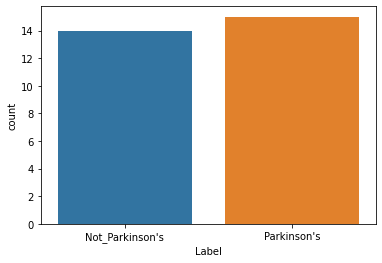

In [5]:
sns.countplot(x = 'Label', data=data)
#plt.savefig("label.png", format="png", dpi=300)
plt.show()

In [6]:
data.head()

,Label,Patient,A1_1Deg,A1_1Deg_err,B1_1Deg,B1_1Deg_err,C1_1Deg,C1_1Deg_err,1_Deg_ResSoS_1,1Deg_AdjR2_1,...,8_Deg_ResSoS_1,8Deg_AdjR2_1,A2_8Deg,A2_8Deg_err,B2_8Deg,B2_8Deg_err,C2_8Deg,C2_8Deg_err,8_Deg_ResSoS_2,8Deg_AdjR2_2
0,Not_Parkinson's,PD001,10.388190,0.006132,0.049329,0.000006,0.011989,0.000337,8928.709194,0.990598,...,6698.838281,0.951413,10.273124,0.044206,0.386347,0.000384,0.037356,0.002439,6809.455800,0.939095
1,Not_Parkinson's,PD002,10.429055,0.006929,0.049478,0.000007,0.002837,0.000379,11388.604704,0.988092,...,4769.901822,0.967360,11.482500,0.049154,0.395412,0.000380,-0.002486,0.002419,8383.481840,0.939586
2,Not_Parkinson's,PD003,10.097088,0.005091,0.049368,0.000006,0.005707,0.000287,6140.292312,0.993141,...,3488.747176,0.968709,10.084338,0.019838,0.394595,0.000174,-0.035466,0.001106,1349.962240,0.987259
3,Not_Parkinson's,PD004,10.482881,0.022179,0.049585,0.000023,0.016056,0.001212,117748.979710,0.879372,...,10972.045844,0.920137,11.493414,0.048867,0.401386,0.000377,-0.042463,0.002395,8242.136178,0.940370
4,Not_Parkinson's,PD005,10.181273,0.008833,0.049368,0.000010,0.001569,0.000494,18447.340517,0.979692,...,18268.960666,0.809586,10.370348,0.036121,0.395392,0.000308,-0.030769,0.001960,4485.300264,0.960035


In [9]:
# with gain
# Standardization
sc = StandardScaler()
data_input = pd.DataFrame(sc.fit_transform(data.iloc[:,2:]),index=data.iloc[:,2:].index, columns= data.iloc[:,2:].columns)

# Features and labels
x = data_input.iloc[:,:]
y = data.iloc[:,0]

## Convert the categorical variables to number
LabelEncoder_gender = LabelEncoder()
y = LabelEncoder_gender.fit_transform(y)

# convert array to series 
y = pd.Series(y,name='Label')
df = pd.concat([x,y],axis=1)

In [10]:
df

,A1_1Deg,A1_1Deg_err,B1_1Deg,B1_1Deg_err,C1_1Deg,C1_1Deg_err,1_Deg_ResSoS_1,1Deg_AdjR2_1,A2_1Deg,A2_1Deg_err,...,8Deg_AdjR2_1,A2_8Deg,A2_8Deg_err,B2_8Deg,B2_8Deg_err,C2_8Deg,C2_8Deg_err,8_Deg_ResSoS_2,8Deg_AdjR2_2,Label
0,-0.101457,-0.640764,-0.076286,-0.701691,0.187603,-0.701602,-0.496173,0.562528,-0.093489,-0.974860,...,0.388559,0.080403,-0.183744,-1.933965,-0.186078,2.430309,-0.185658,-0.346541,0.335731,0
1,-0.076535,-0.561175,0.451166,-0.608657,-0.394886,-0.608655,-0.472873,0.529688,-0.269396,-0.277867,...,0.617965,2.038586,0.010963,-0.663607,-0.199878,1.178616,-0.199159,-0.203187,0.340154,0
2,-0.278989,-0.744801,0.063202,-0.810950,-0.212194,-0.810821,-0.522584,0.595850,-0.239333,-1.246402,...,0.637375,-0.225273,-1.142608,-0.778159,-1.082598,0.142534,-1.083575,-0.843762,0.769440,0
3,-0.043708,0.961953,0.827975,1.233255,0.446425,1.231498,0.534541,-0.894932,-0.107871,2.044362,...,-0.061375,2.056258,-0.000349,0.173552,-0.215631,-0.077294,-0.215175,-0.216060,0.347213,0
4,-0.227648,-0.371073,0.060480,-0.354646,-0.475598,-0.354426,-0.406015,0.419612,-0.306015,-0.665244,...,-1.651711,0.237825,-0.501887,-0.666471,-0.508541,0.290072,-0.508470,-0.558213,0.524289,0
5,-0.153698,-0.209565,-0.237615,-0.165584,0.680540,-0.165614,-0.334530,0.322090,-0.105350,-0.014406,...,0.202416,0.216055,0.737852,1.420151,0.669184,-0.399616,0.667979,0.494757,-0.380675,0
6,-0.378220,-0.470434,-0.502797,-0.454824,-0.344210,-0.454380,-0.443493,0.465576,-0.407542,-0.942056,...,0.884618,-0.682914,-0.976207,-0.321981,-0.898529,-0.161340,-0.899101,-0.785747,0.705276,0
7,-0.422814,1.443439,-0.461836,2.036579,2.725447,2.033791,1.086370,-1.960724,-0.225167,0.380154,...,-0.775364,-2.642530,2.216908,2.183482,2.869066,-1.223308,2.863302,2.585684,-3.554912,0
8,-0.202946,-0.739022,-0.378231,-0.813042,-0.430705,-0.812740,-0.521509,0.595993,-0.367456,-0.496639,...,0.976388,0.133028,-1.024282,-0.441392,-0.990129,-0.509905,-0.990945,-0.804313,0.738429,0
9,-0.188915,0.502580,2.311421,0.722049,-1.533515,0.720184,0.116433,-0.353601,0.051583,0.676796,...,-0.665145,1.254033,1.428604,0.948678,1.125253,-0.100106,1.125902,1.340749,-0.897154,0


In [11]:
# # Without gain
# # Standardization
# sc = StandardScaler()
# data_input = pd.DataFrame(sc.fit_transform(data.iloc[:,2:]),index=data.iloc[:,2:].index, columns= data.iloc[:,2:].columns)

# # Features and labels
# x = data_input.iloc[:,2:]
# y = data.iloc[:,0]

# ## Convert the categorical variables to number
# LabelEncoder_gender = LabelEncoder()
# y = LabelEncoder_gender.fit_transform(y)

# # convert array to series 
# y = pd.Series(y,name='Label')
# df = pd.concat([x,y],axis=1)

In [11]:
# spliting feature
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

### Baseline model

In [12]:
#KFold only
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha':3,
            'learning_rate':1.0,
            'n_estimators':100}
model = xgb.XGBClassifier(**params)

all_run = []
for split in range(30):
    #cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=split)
    kfold = KFold(n_splits=5, shuffle=True,random_state=split)
    scores = cross_val_score(model,x,y,scoring='roc_auc', cv=kfold)
    result = [[split,scores.mean()]]
    all_run += result
#print(all_run)
all_run_df = pd.DataFrame(all_run,columns=['split','acc'])
print("XGBoost based model accuracy score: {0:0.4f}".format(all_run_df['acc'].mean()))

XGBoost based model accuracy score: 0.5995


In [180]:
# ## Without gain
# # stratifiedKFold
# # create stratifiedKFold object
# skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
# rf_accu_stratified = []

# # Feature Scaling for input features
# scaler = preprocessing.MinMaxScaler()
# x_scaled = scaler.fit_transform(x)

# # create classifier objects
# model = xgb.XGBClassifier()
# for train_index, test_index in skf.split(x,y):
#     x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
#     y_train_fold, y_test_fold = y[train_index], y[test_index]
#     model.fit(x_train_fold, y_train_fold)
#     rf_accu_stratified.append(model.score(x_test_fold, y_test_fold))

# print('XGB based model accuracy score: {0:0.4f}'.format(mean(rf_accu_stratified)),'+/-',std(rf_accu_stratified))

XGB based model accuracy score: 0.6000 +/- 0.2905932629027116


In [13]:
## Wit gain
# stratifiedKFold
# create stratifiedKFold object
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Feature Scaling for input features
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)

# create classifier objects
model = xgb.XGBClassifier()
xgb_accu_stratified = []
for train_index, test_index in skf.split(x,y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    model.fit(x_train_fold, y_train_fold)
    xgb_accu_stratified.append(model.score(x_test_fold, y_test_fold))

print('XGB based model accuracy score: {0:0.4f}'.format(mean(xgb_accu_stratified)),'+/-',std(xgb_accu_stratified))

XGB based model accuracy score: 0.5833 +/- 0.25


### Hyperparameter Tuning

In [26]:
params = {'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
          'gamma': hp.uniform('gamma', 0, 9),
          'min_child_weight': hp.choice('min_child_weight', range(1, 6)),
          'subsample': hp.uniform('subsample', 0.7, 1.0),
          'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),
          'max_depth': hp.choice('max_depth', range(3, 18)),
          'n_estimators': hp.choice('n_estimators', [50, 100, 200, 300, 400, 500, 1000])}
    
min_child_weight_ls = range(1, 6)
max_depth_ls = range(3, 18)
n_estimators_ls = [100, 200, 300, 400, 500, 1000, 1500, 2000]

In [27]:
def hyperparameter_tuning(params):
    clf=xgb.XGBClassifier(**params, n_jobs=6, random_state=1, seed=1,
                              use_label_encoder=False)
    clf.fit(x_train, y_train,eval_metric='auc')
    pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
#     print ("SCORE:", accuracy) 
    return {'loss': -accuracy, 'status': STATUS_OK }

In [28]:
trials = Trials()

best_hyperparams = fmin(fn = hyperparameter_tuning,
                        space = params,
                        algo = tpe.suggest,
                        max_evals = 50,
                        trials = trials)

100%|██████████| 50/50 [00:07<00:00,  6.55trial/s, best loss: -0.8333333333333334]


In [29]:
best_model = xgb.XGBClassifier(n_estimators=n_estimators_ls[best_hyperparams['n_estimators']],
                               max_depth=max_depth_ls[best_hyperparams['max_depth']],
                               min_child_weight=min_child_weight_ls[best_hyperparams['min_child_weight']],
                               learning_rate=best_hyperparams['learning_rate'],
                               gamma=best_hyperparams['gamma'],
                               subsample=best_hyperparams['subsample'],
                               colsample_bytree=best_hyperparams['colsample_bytree'],
                               n_jobs=6, random_state=1, seed=1)
    

In [30]:
# With gain
#save
file_name = 'hyper_xgb.pkl'
# pickle.dump(best_model, open(file_name,'wb'))

#load
xgb_hyper = pickle.load(open(file_name,'rb'))



In [73]:
# # Without gain
# #save
# file_name = 'hyper_xgb.pkl'
# #pickle.dump(best_model, open(file_name,'wb'))

# #load
# xgb_hyper = pickle.load(open(file_name,'rb'))

### AUC score with tuned parameters

In [19]:
#KFOLD
all_run = []
for split in range(30):
    #cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=split)
    kfold = KFold(n_splits=5, shuffle=True,random_state=split)
    scores = cross_val_score(xgb_hyper,x,y,scoring='roc_auc', cv=kfold)
    result = [[split,scores.mean()]]
    all_run += result
    
#print(all_run)
all_run_df = pd.DataFrame(all_run,columns=['split','acc'])
print(all_run_df['acc'].mean(),all_run_df['acc'].std())

0.7051068376068378 0.11734070044535548


In [34]:
# #KFOLD
# all_run = []
# for split in range(30):
    #cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=split)
kfold = KFold(n_splits=5, shuffle=True,random_state=split)
scores = cross_val_score(xgb_hyper,x,y,scoring='roc_auc', cv=kfold)
print(scores.mean())
# result = [[split,scores.mean()]]
# all_run += result
    
# #print(all_run)
# all_run_df = pd.DataFrame(all_run,columns=['split','acc'])
# print(all_run_df['acc'].mean(),all_run_df['acc'].std())

0.7269444444444446


In [148]:
# # Without gain
# # create stratifiedKFold object
# skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
# rf_accu_stratified = []

# # Feature Scaling for input features
# scaler = preprocessing.MinMaxScaler()
# x_scaled = scaler.fit_transform(x)

# for train_index, test_index in skf.split(x,y):
#     x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
#     y_train_fold, y_test_fold = y[train_index], y[test_index]
#     xgb_hyper.fit(x_train_fold, y_train_fold)
#     rf_accu_stratified.append(xgb_hyper.score(x_test_fold, y_test_fold))

# print('XGB model with tuned parameters accuracy score: {0:0.4f}'.format(mean(rf_accu_stratified)))

XGB model with tuned parameters accuracy score: 0.7667


In [24]:
# With gain
# create stratifiedKFold object
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
rf_accu_stratified = []

# Feature Scaling for input features
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)

for train_index, test_index in skf.split(x,y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    xgb_hyper.fit(x_train_fold, y_train_fold)
    rf_accu_stratified.append(xgb_hyper.score(x_test_fold, y_test_fold))
print('XGB model with tuned parameters accuracy score: {0:0.4f}'.format(mean(rf_accu_stratified)))


XGB model with tuned parameters accuracy score: 0.6833


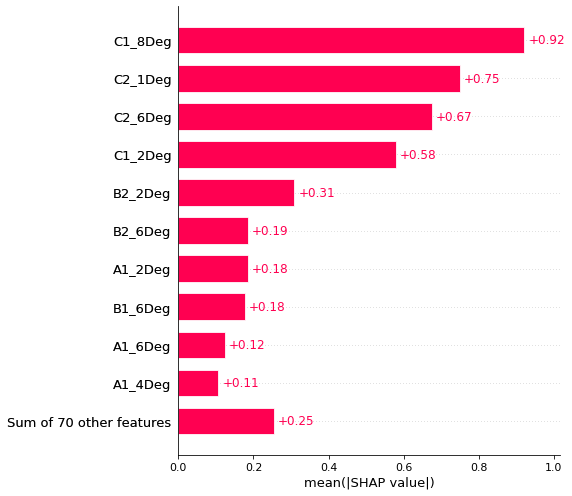

In [21]:
classifier = xgb.XGBClassifier()
classifier.fit(x_train,y_train)
# print the JS visualization code to the notebook
shap.initjs()
explainer = shap.Explainer(classifier)
shap_values = explainer(x_test)
shap.plots.bar(shap_values, max_display=11,show=False)

plt.tight_layout()
#plt.savefig("shap_Gain.png", format="png", dpi=300)
plt.show()

In [25]:
# gain_df = gain_df[['Label','Patient','SixDegGain','A1_2Deg','B2_2Deg',
#             'C2_1Deg','C2_6Deg','C2_4Deg','EightDegGain','B2_1Deg','C1_8Deg','FourDegGain']]

### Feature importance

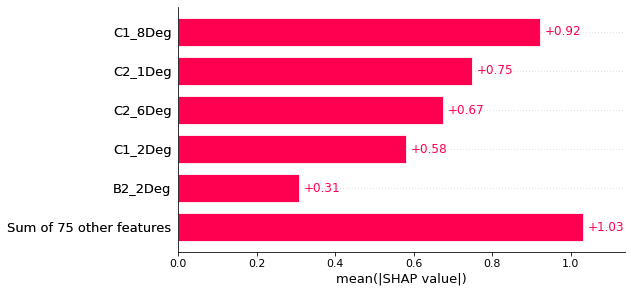

In [37]:
classifier = xgb.XGBClassifier()
classifier.fit(x_train,y_train)
# print the JS visualization code to the notebook
shap.initjs()
explainer = shap.Explainer(classifier)
shap_values = explainer(x_test)
shap.plots.bar(shap_values, max_display=6,show=False)
plt.savefig("shap_no_gain.png", format="png", dpi=300)

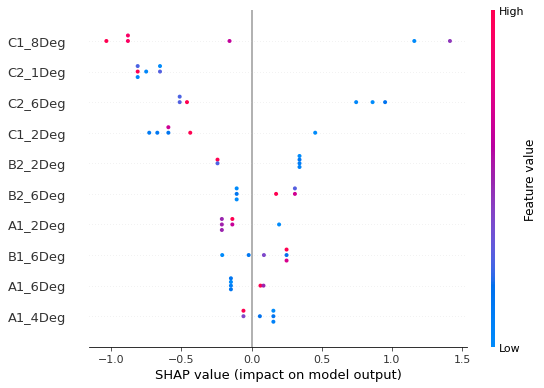

In [38]:
X_importance = x_test
explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(X_importance)
shap.summary_plot(shap_values, X_importance,max_display=10,show=False)
#plt.show()
plt.tight_layout()
plt.savefig("shap_Gain_graph.png", format="png", dpi=300)

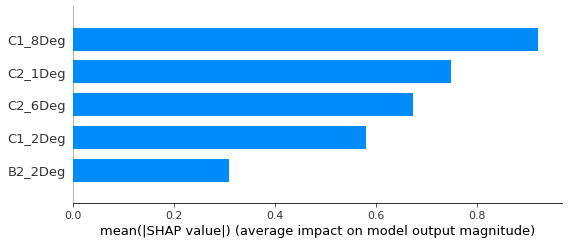

In [24]:
X_importance = x_test
explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(X_importance)
shap.summary_plot(shap_values, X_importance,max_display=5,plot_type='bar')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

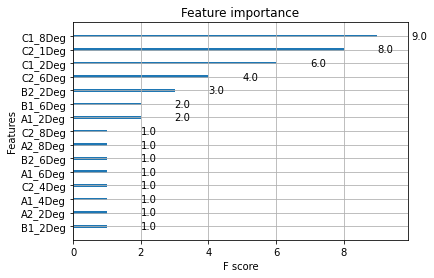

In [260]:
xgb.plot_importance(classifier)

#### KFold with Feature importance

In [42]:
# Kfold
data = data[['Label','Patient','C1_8Deg','C2_1Deg','C2_6Deg',
            'C1_2Deg','B2_2Deg','B2_6Deg','A1_2Deg','B1_6Deg','A1_6Deg','A1_4Deg']]
#data = data[['Label','Patient','B2_6Deg','C2_1Deg','C1_2Deg','C1_8Deg',
#             'C2_6Deg','A1_4Deg','A1_6Deg','A1_2Deg','B2_2Deg','B1_6Deg']]

# data = data[['Label','Patient','C1_8Deg','C2_1Deg','C2_6Deg','C1_2Deg',
#             'B2_2Deg','B2_6Deg','A1_2Deg','B1_6Deg','A1_6Deg','A1_4Deg']]
x = data.iloc[:,2:]
# sc = StandardScaler()
# x = sc.fit_transform(x)
y = data.iloc[:,0]
y = LabelEncoder_gender.fit_transform(y)
# x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
# best_model.fit(x_train, y_train)
#best_model.fit(x,y,eval_metric='auc')
all_run = []
for split in range(30):
    #cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=split)
    kfold = KFold(n_splits=5, shuffle=True,random_state=split)
    scores = cross_val_score(xgb_hyper,x,y,scoring='roc_auc', cv=kfold)
    result = [[split,scores.mean()]]
    all_run += result
#print(all_run)
all_run_df = pd.DataFrame(all_run,columns=['split','acc'])
print(all_run_df['acc'].mean(),all_run_df['acc'].std())
    

0.8152350427350428 0.08195288816413086


### Stratisfied with Feature importance

In [39]:
data = data[['Label','Patient','C1_8Deg','C2_1Deg','C2_6Deg',
            'C1_2Deg','B2_2Deg','B2_6Deg','A1_2Deg','B1_6Deg','A1_6Deg','A1_4Deg']]

x = gain_df.iloc[:,2:]
# sc = StandardScaler()
# x = sc.fit_transform(x)
y = gain_df.iloc[:,0]
y = LabelEncoder_gender.fit_transform(y)
# spliting feature
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
# Hyperparameter Tuning function
def hyperparameter_tuning(params):
    clf = xgb.XGBClassifier(**params)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    accuracy = roc_auc_score(y_test, pred>0.5)
#   print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

NameError: name 'gain_df' is not defined

In [28]:
# Optimizing
trials = Trials()

best_hyperparams = fmin(fn = hyperparameter_tuning,
                        space = params,
                        algo = tpe.suggest,
                        max_evals = 50,
                        trials = trials)

100%|██████████| 50/50 [00:11<00:00,  4.51trial/s, best loss: -0.575]


In [29]:
# Model with tuned parameters
best_model = xgb.XGBClassifier(n_estimators=n_estimators_ls[best_hyperparams['n_estimators']],
                               max_depth=max_depth_ls[best_hyperparams['max_depth']],
                               min_child_weight=min_child_weight_ls[best_hyperparams['min_child_weight']],
                               learning_rate=best_hyperparams['learning_rate'],
                               gamma=best_hyperparams['gamma'],
                               subsample=best_hyperparams['subsample'],
                               colsample_bytree=best_hyperparams['colsample_bytree'],
                               n_jobs=6, random_state=1, seed=1)

#### Save stratified latest model

In [29]:
file_name = 'hyper_gain_stra_xgb.pkl'
pickle.dump(best_model, open(file_name,'wb'))

#### Load the best model

In [131]:
# Without gain
#save
file_name = 'hyper_stra_xgb.pkl'
#pickle.dump(best_model, open(file_name,'wb'))

#load
xgb_hyper = pickle.load(open(file_name,'rb'))

In [30]:
# With gain
#save
file_name = 'hyper_gain_stra_xgb.pkl'
#pickle.dump(best_model, open(file_name,'wb'))

#load
xgb_hyper = pickle.load(open(file_name,'rb'))

In [78]:
## Withoud gain
skf = StratifiedKFold(n_splits= 10, shuffle=True, random_state=1)
xgb_accu_stratified = []

# Feature Scaling for input features
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)

#for split in range(50):
#for split in range(10):
for train_index, test_index in skf.split(x,y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    xgb_hyper.fit(x_train_fold, y_train_fold)
    #pred = best_model.predict(x_test_fold)
    accuracy = roc_auc_score(y_test_fold, xgb_hyper.predict_proba(x_test_fold)[:,1])
    xgb_accu_stratified.append(accuracy)

print('XGB model with feature importance accuracy score: {0:0.4f}'.format(mean(xgb_accu_stratified)),std(xgb_accu_stratified))

XGB model with feature importance accuracy score: 0.8500 0.32015621187164245


In [31]:
## With gain
# gain_df = gain_df[['Label','Patient','SixDegGain','A1_2Deg','B2_2Deg',
#             'C2_1Deg','C2_6Deg','C2_4Deg','EightDegGain','B2_1Deg','C1_8Deg','FourDegGain']]
skf = StratifiedKFold(n_splits= 10, shuffle=True, random_state=1)
xgb_accu_stratified = []

x = gain_df.iloc[:,2:]
# sc = StandardScaler()
# x = sc.fit_transform(x)
y = gain_df.iloc[:,0]
y = LabelEncoder_gender.fit_transform(y)
# spliting feature
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# Feature Scaling for input features
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)

#for split in range(50):
#for split in range(10):
for train_index, test_index in skf.split(x,y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    xgb_hyper.fit(x_train_fold, y_train_fold)
    #pred = best_model.predict(x_test_fold)
    accuracy = roc_auc_score(y_test_fold, xgb_hyper.predict_proba(x_test_fold)[:,1])
    xgb_accu_stratified.append(accuracy)

print('XGB model with feature importance accuracy score: {0:0.4f}'.format(mean(xgb_accu_stratified)),std(xgb_accu_stratified))

XGB model with feature importance accuracy score: 0.8250 0.225


### Confusion matrix

In [132]:
xgb_hyper.fit(x_train, y_train)
y_pred = xgb_hyper.predict_proba(x_test)[:,1]
predictions = [round(value) for value in y_pred]

# Accuracy
accuracy = roc_auc_score(y_test,predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 50.00%


In [133]:
#confusion matrix
confusion = confusion_matrix(y_test,predictions)
print(confusion)

#  Sensitivity 
TP = confusion[1,1] # true positives
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # False positives
FN = confusion[1,0] # false negatives

sensitivity = TP/float(TP+FN)
print(sensitivity)

# Specificity
specificity = TN/float(TN+FP)
print(specificity)


auc_score = roc_auc_score(y_test,predictions)
fpr , tpr , thresholds = roc_curve (y_test, predictions)
print(auc_score)

[[0 5]
 [0 1]]
1.0
0.0
0.5


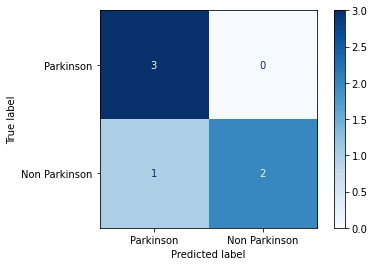

In [113]:
class_names = ['Parkinson','Non Parkinson']
disp = plot_confusion_matrix(xgb_hyper, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

plt.savefig('cm.png',dpi=300)
plt.show()

#### Learning Curve

In [115]:
%%time
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=7)
model = xgb.XGBClassifier( n_estimators=100,eta=0.066)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error",'logloss'], eval_set=eval_set, verbose=False)

CPU times: user 372 ms, sys: 258 ms, total: 631 ms
Wall time: 142 ms


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.066,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.0659999996, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, ...)

In [116]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [117]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.33%


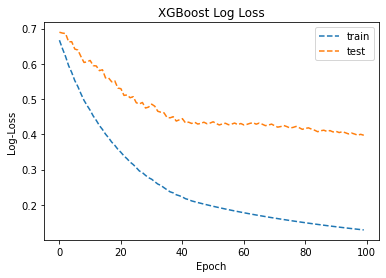

<Figure size 432x288 with 0 Axes>

In [118]:
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0,epochs)
plt.plot(x_axis, results['validation_0']['logloss'], label='train',ls='--')
plt.plot(x_axis, results['validation_1']['logloss'], label='test',ls='--')
plt.xlabel('Epoch')
plt.ylabel('Log-Loss')
plt.title('XGBoost Log Loss')
plt.legend()
plt.show()
plt.savefig('lc.png',dpi=300)

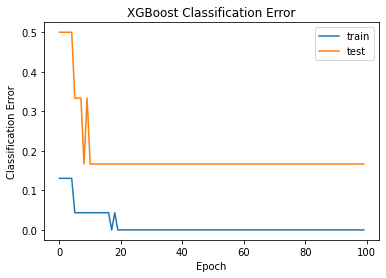

<Figure size 432x288 with 0 Axes>

In [119]:
results = model.evals_result()
plt.plot(x_axis,results['validation_0']['error'], label='train',ls='-')
plt.plot(x_axis, results['validation_1']['error'], label='test',ls='-')
plt.xlabel('Epoch')
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.legend()
plt.show()
plt.savefig('lc_error.png',dpi=300)

#### ROC curve

In [134]:
#confusion matrix
# confusion = confusion_matrix(y_pred,y_test)
# print(confusion)

#  Sensitivity 
TP = confusion[1,1] # true positives
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # False positives
FN = confusion[1,0] # false negatives

sensitivity = TP/float(TP+FN)
print(sensitivity)

# Specificity
specificity = TN/float(TN+FP)
print(specificity)


auc_score = roc_auc_score(y_test, y_pred)
fpr , tpr , thresholds = roc_curve (y_test, y_pred)
print(auc_score)

1.0
0.0
1.0


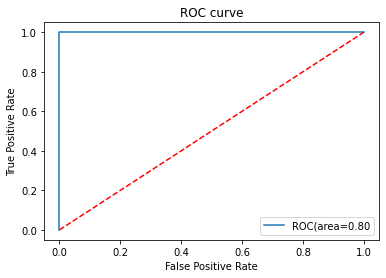

<Figure size 432x288 with 0 Axes>

In [135]:
def plot_roc_curve(fpr,tpr): 
  random_probs = [0 for i in range(len(y_test))]
  p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
  plt.plot(fpr,tpr,label='ROC(area=0.80')
  plt.plot(p_fpr, p_tpr,'--',color='red') 
  plt.axis([-0.05,1.05,-0.05,1.05]) 
  plt.title('ROC curve')
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.legend()
  #plt.savefig('roc_curve.png',dpi=300)
  plt.show()    
  
plot_roc_curve (fpr,tpr)
plt.savefig('roc.png',dpi=300)

In [ ]:
def plot_roc_curve(fpr,tpr): 
  random_probs = [0 for i in range(len(y_test))]
  p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
  plt.plot(fpr,tpr,label='ROC(area=0.80')
  plt.plot(p_fpr, p_tpr,'--',color='red') 
  plt.axis([-0.05,1.05,-0.05,1.05]) 
  plt.title('ROC curve')
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.legend()
  #plt.savefig('roc_curve.png',dpi=300)
  plt.show()    
  
plot_roc_curve (fpr,tpr)

In [ ]:
def plot_roc_curve(fpr,tpr): 
  random_probs = [0 for i in range(len(y_test))]
  p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
  plt.plot(fpr,tpr,label='ROC(area=0.80')
  plt.plot(p_fpr, p_tpr,'--',color='red') 
  plt.axis([-0.05,1.05,-0.05,1.05]) 
  plt.title('ROC curve')
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.legend()
  #plt.savefig('roc_curve.png',dpi=300)
  plt.show()    
  
plot_roc_curve (fpr,tpr)

In [3]:
txt = " Hello World"
txt.strip()

'Hello World'